In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import random

from sklearn.datasets import make_blobs
from scipy import stats
from matplotlib import pyplot as plt

### Create Dataset

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [3]:
df.head()

,x,y,label
0,-9.379424,1.076711,1
1,-9.352142,-7.480392,0
2,-9.060164,-6.845242,0
3,-10.770734,2.075497,1
4,-10.036333,0.794672,1


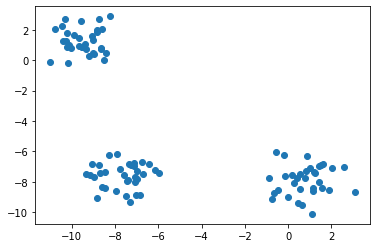

In [4]:
plt.scatter(df['x'], df['y'])
plt.show()

### Create missing values at random locations of `df`

In [5]:
df['y'].loc[df['y'].sample(frac=0.1).index] = np.nan

In [6]:
df.isnull().any()

x        False
y         True
label    False
dtype: bool

In [7]:
df.isnull().sum()

x         0
y        10
label     0
dtype: int64

In [8]:
get_nans = lambda dframe : {col : list(np.where(dframe[col].isnull())[0]) for col in dframe.columns}

In [9]:
all_nans = get_nans(dframe=df)

In [10]:
all_nans

{'x': [], 'y': [0, 9, 11, 13, 30, 55, 57, 68, 71, 73], 'label': []}

### `NaN` fillers

#### Imputation

In [11]:
class Imputer():
    def __init__(self, strategy):
        self.available_strats = ['mean', 'median', 'mode']
        self.strategy = 'median' if strategy not in self.available_strats else strategy
    
    def fill_values(self, data, col):
        if (self.strategy == 'mean'):
            fval = data[col].mean()
        elif (self.strategy == 'median'):
            fval = data[col].mean()
        else:
            fval = stats.mode(data[col])[0][0]
        return fval
    
    def simple_imputer(self, data, col):
        fval = self.fill_values(data=data, col=col)
        non_nans = data[col].fillna(fval).to_list()
        return non_nans
    
    def label_imputer(self, data, col, label):
        col_label_df = data[[col, label]]
        counts_df = col_label_df[label].value_counts().to_frame()
        classes = counts_df.index.to_list()
        
        fval_class = []
        for each_class in classes:
            mini_frame = col_label_df[col_label_df[label] == each_class]
            non_nans_frame = pd.Series(data=self.simple_imputer(data=mini_frame, col=col), index=mini_frame.index)
            fval_class.append(non_nans_frame)
        final_vals = pd.concat(fval_class).sort_index().to_list()
        
        return final_vals

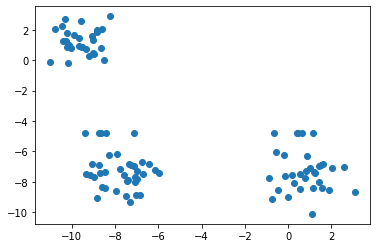

In [12]:
im = Imputer(strategy='median')
x = df['x'].to_list()
non_nans = im.simple_imputer(data=df, col='y')
plt.scatter(x, non_nans)
plt.show()

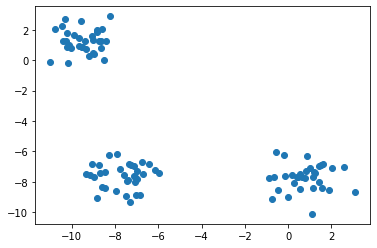

In [13]:
im = Imputer(strategy='median')
non_nans = im.label_imputer(data=df, col='y', label='label')
plt.scatter(x, non_nans)
plt.show()